In [ ]:
%%html
<script>
(function() {
  // Create the toggle button
  const rtlButton = document.createElement("button");
  rtlButton.textContent = "Toggle LTR";
  rtlButton.id = "top-rtl-toggle";
  rtlButton.style.marginLeft = "8px";
  rtlButton.style.padding = "4px 10px";
  rtlButton.style.fontSize = "14px";
  rtlButton.style.cursor = "pointer";

  // State
  var rtlActive = false;

  // Styling function
  var applyStyleToEditor = (editor) => {
    if (!editor) return;
    var direction = getComputedStyle(editor).getPropertyValue('direction')=='rtl' ? 'ltr' : 'rtl';
    var text_align = getComputedStyle(editor).getPropertyValue('text-align')=='right' ? 'left' : 'right';
    editor.style.setProperty('direction', direction, 'important');
    editor.style.setProperty('text-align', text_align, 'important');
  };

  // Toggle logic
  rtlButton.onclick = () => {
    rtlActive = !rtlActive;
    rtlButton.textContent = rtlActive ? "Toggle LTR" : "Toggle RTL";
    document.querySelectorAll('.jp-MarkdownCell .jp-InputArea-editor').forEach(applyStyleToEditor);
    document.querySelectorAll('.jp-RenderedHTMLCommon code, .jp-RenderedHTMLCommon code span').forEach(applyStyleToEditor);
    document.querySelectorAll('jp-RenderedHTMLCommon, .jp-RenderedHTMLCommon *').forEach(applyStyleToEditor);
  };

  // Watch for focus into editing Markdown cells
  // document.addEventListener('focusin', (event) => {
  //   const editor = event.target.closest('.jp-MarkdownCell .jp-InputArea-editor');
  //    if (editor) applyStyleToEditor(editor);
  // });

  // Insert into top toolbar if not already present
  var insertIntoToolbar = () => {
    const toolbar = document.querySelector('.jp-NotebookPanel-toolbar');
    if (toolbar && !document.getElementById("top-rtl-toggle")) {
      toolbar.appendChild(rtlButton);
    } else {
      // Try again in a moment if toolbar isn't ready yet
      setTimeout(insertIntoToolbar, 300);
    }
  };

  insertIntoToolbar();
})();
</script>

In [ ]:
%%html
<!-- <style>
  table {display: inline-block}
</style> -->

# פתרון מערכות לינאריות

נניח שיש לנו מערכת של משוואות לינאריות (כלומר משוואות שבהן המשתנים מופיעים בחזקה ראשונה בלבד), לדוגמה:

$$
\begin{cases}
2x_1 + x_2 = 5 \\
x_1 - x_2 = 1
\end{cases}
$$

אפשר לכתוב זאת בצורה מטריציונית קומפקטית:

$$
A x = b
$$

ייצוג מפורש:

$$
A = \begin{bmatrix}
2 & 1 \\
1 & -1
\end{bmatrix},
\quad
x = \begin{bmatrix}
x_1 \\
x_2
\end{bmatrix},
\quad
b = \begin{bmatrix}
5 \\
1
\end{bmatrix}.
$$

כאשר:
* $A$ היא מטריצה שמכילה את המקדמים של המשוואות,
* $x$ הוא וקטור המשתנים הבלתי ידועים,
* $b$ הוא וקטור התוצאות (האגפים הימניים).

כך מקבלים את הכתיבה הקומפקטית:

$$
A x = b
\quad \Longleftrightarrow \quad
\begin{bmatrix}
2 & 1 \\
1 & -1
\end{bmatrix}
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix}
=
\begin{bmatrix}
5 \\
1
\end{bmatrix}.
$$

### שתי דרכים לפתרון
1. לחשב במפורש את $A^{-1}$ (המטריצה ההפוכה של $A$), ואז להציב:

   $$
   x = A^{-1} b
   $$

2. להשתמש ישירות באלגוריתם נומרי שמחשב את $x$ בלי למצוא את $A^{-1}$:
```python
   x = np.linalg.solve(A, b)
```


```{note}
מדוע לא נחשב את $A^{-1}$ ישירות?
* **חוסר יציבות נומרית**: מחשב עובד עם ספרות מוגבלות (למשל 16 ספרות עשרוניות). 
  חישוב המטריצה ההפוכה עלול להגדיל שגיאות קטנות במספרים, במיוחד אם $A$ קרובה להיות לא הפיכה (סינגולרית).
* **יעילות**: לחשב מטריצה הפוכה זה ארוך ומיותר אם כל מה שאנחנו רוצים זה לפתור את המערכת. 
  `np.linalg.solve` משתמש בשיטות ישירות (כמו פירוק LU) שמגיעות לפתרון מהר יותר ובצורה מדויקת יותר.
```
`````{admonition} סיבוכיות (במה תלוים זמן ומשאבי החישוב)
:class: tip
* אם $A$ בגודל $n \times n$, חישוב $A^{-1}$ דורש בערך $\mathcal{O}(n^3)$ פעולות, 
  ואז צריך גם להכפיל אותה ב־$b$ שזה $\mathcal{O}(n^2)$ נוספות.
* לעומת זאת, `np.linalg.solve` פותר את המערכת ישירות עם $\mathcal{O}(n^3)$ פעולות, **בלי** לעשות את הצעד המיותר של חישוב $A^{-1}$.
`````

`````{admonition} דוגמאות פיסיקליות
:class: tip
מערכות לינאריות מופיעות כמעט בכל תחום בפיסיקה:

* **מעגלים חשמליים**: לפי חוקי אוהם וקירכהוף נוצרת מערכת משוואות לינאריות למציאת מתחים וזרמים.
* **מכניקה קלאסית**: מערכת של מסות מחוברות בקפיצים מתוארת על ידי משוואות לינאריות לכוחות ותזוזות.
* **אנליזת תגובה (response analysis)**: קביעה כיצד מערכת מגיבה לגירוי (לדוגמה שדה חשמלי או כוח חיצוני).
* **חישוב התפתחות בזמן קצר**: בצעד אינטגרציה נומרית של משוואות דיפרנציאליות נדרשת לעיתים קרובות הפתרה של מערכת לינארית בכל צעד.
`````

### מספר התניה (Condition Number)

לפעמים המערכת "רגישה" לשינויים קטנים.  
כדי למדוד זאת משתמשים ב־**מספר ההתניה** של $A$, שמוגדר כך:

$$
\kappa(A) = \|A\| \cdot \|A^{-1}\|
$$

אם $\kappa(A)$ קטן, המערכת יציבה — שגיאות קטנות בנתונים לא משפיעות הרבה על התוצאה.  
אם $\kappa(A)$ גדול, המערכת לא יציבה — טעות קטנה במדידות או בחישובים עלולה לגרום לשינוי גדול מאוד בפתרון.

ב־NumPy אפשר לחשב את זה בעזרת:
```python
np.linalg.cond(A)
``` 

```{note}
#### כלל אצבע
**אל תחשבו $A^{-1}$** אלא השתמשו ב-`np.linalg.solve`, ובדקו את ה-condition number אם אתם חושדים שמדובר במטריצה "כמעט סינגולרית".
```


### דוגמה: פתרון מערכת לינארית פשוטה

נגדיר מטריצה $A$ ווקטור אגף ימין $b$, שמייצגים מערכת של שתי משוואות בשני נעלמים.  
נשתמש ב־`np.linalg.solve` כדי למצוא את הפתרון $x$ שמקיים את $Ax = b$.  
בסוף נחשב את ה־residual (השארית) כלומר $Ax - b$, כדי לבדוק עד כמה הפתרון באמת מתאים — 
במערכת מדויקת השארית אמורה להיות קרובה מאוד ל־0.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Modern RNG (prefer over legacy np.random.*)
rng = np.random.default_rng(seed=42)
np.__version__, "RNG OK"

# Solve Ax = b (single RHS)
A = np.array([[3., 1.],
              [1., 2.]])
b = np.array([9., 8.])

x = np.linalg.solve(A, b)
residual = A @ x - b
x, residual


(array([2., 3.]), array([0., 0.]))

### דוגמה: מערכת כמעט סינגולרית (Nearly Singular)

כאן נגדיר מטריצה $C$ שקרובה מאוד להיות סינגולרית (כלומר כמעט לא הפיכה).  
במקרים כאלה מספר ההתניה $\kappa(C)$ יוצא גדול מאוד, מה שמצביע על כך שהמערכת רגישה במיוחד לשינויים קטנים.  

נראה זאת בכך שנפתור את אותה מערכת פעמיים: פעם עם וקטור אגף ימין $d_1$, ופעם עם $d_2$ שנבדל ממנו רק בשינוי זעיר.  
נבחין כי הפתרונות $x_1$ ו־$x_2$ שונים בצורה משמעותית — עדות לכך שמערכות כאלה אינן יציבות נומרית, 
ואפילו טעות קטנה במדידות יכולה לשנות לגמרי את התוצאה.


In [4]:
# Nearly singular system: sensitive to perturbations
C = np.array([[1., 1.],
              [1., 1.000001]])
condC = np.linalg.cond(C)

d1 = np.array([2., 2.])
d2 = np.array([2., 2.000001])  # tiny perturbation

x1 = np.linalg.solve(C, d1)
x2 = np.linalg.solve(C, d2)

condC, x1, x2


(np.float64(4000002.0005977214), array([2., 0.]), array([1., 1.]))

### דוגמה: פתרון מערכת עם מספר אגפים בצד ימין

במקום לפתור את המערכת $Ax = b$ עבור וקטור אחד של אגף ימין,  
אפשר לפתור בבת אחת עבור כמה וקטורים שונים. במקרה זה נגדיר מטריצה $B$ שכל עמודה בה היא אגף ימין שונה.  

הפקודה `np.linalg.solve(A, B)` מחזירה מטריצה $X$, כאשר כל עמודה ב־$X$ היא פתרון מתאים ל־$Ax = b$ של העמודה המקבילה ב־$B$.  

כך ניתן לפתור כמה מערכות דומות במקביל ביעילות, במקום להריץ את הפתרון שוב ושוב עבור כל וקטור בנפרד.


In [ ]:
# Multiple right-hand sides (Ax = B)
B = np.column_stack([b, [1., 0.]])  # matrix of RHS
X = np.linalg.solve(A, B)

print(B)
np.allclose(A @ X, B), X

In [3]:
import json
from jupyterquiz import display_quiz

example = \
'''
[{
  "question": "עבור פתרון מערכת עם מספר אגפים בצד ימין<br><br>A = np.array([[3., 1.],[1., 2.]])<br>b = np.array([9., 8.])<br>B = np.column_stack([b, [1., 0.]])<br>X = np.linalg.solve(A, B)<br><br>מה נכון לגבי X?",
  "type": "many_choice",
  "answers": [
    {
      "answer": "כל עמודה ב־X היא פתרון של Ax = b המתאים לעמודה ב־B",
      "correct": true,
      "feedback": "נכון! np.linalg.solve(A, B) פותר במקביל עבור כל עמודה של B"
    },
    {
      "answer": "A @ X שווה ל־B (עד סטיות חישוב קטנות)",
      "correct": true,
      "feedback": "נכון! זהו הקריטריון לבדיקה מהירה שהפתרון נכון"
    },
    {
      "answer": "צורת המטריצה X היא (2,)",
      "correct": false,
      "feedback": "לא נכון — X היא מטריצה בגודל (2, 2) כי יש שתי עמודות אגף ימין"
    },
    {
      "answer": "כדי לפתור עבור שתי העמודות חייבים לולאה על כל עמודה בנפרד",
      "correct": false,
      "feedback": "לא נכון — solve תומכת באופן וקטורי במטריצת אגפים ימניים"
    }
  ]
}]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

### שיטת הריבועים הפחותים (Least Squares)

לא תמיד למערכת המשוואות $Ax = b$ יש פתרון מדויק:
- אם יש יותר משוואות מאשר נעלמים ($m > n$) — המערכת **עודפת**. בד"כ אין פתרון אחד שיכול לקיים את כולן בו־זמנית.
- אם יש פחות משוואות מאשר נעלמים ($m < n$) — המערכת **חסרה**. יש יותר מדי דרגות חופש, ולכן קיימים אינסוף פתרונות אפשריים.

במקרים כאלה ניתן להשתמש בשיטת **הריבועים הפחותים** (Least Squares). לשיטה זו שימושים רבים בפיסיקה
הרעיון הוא לא לדרוש פתרון מושלם, אלא למצוא את הווקטור $x$ שמקטין עד כמה שאפשר את ההפרש בין הפתרון המוצע לבין הנתונים. בכתיבה מתמטית:

$$
x^\ast = \arg \min_x \|Ax - b\|_2
$$

במילים פשוטות: אנחנו מחפשים פתרון $x$ שמביא לכך שהשגיאה הכוללת בין $Ax$ לבין $b$ (סכום ריבועי הסטיות) תהיה הכי קטנה שאפשר.  

```{note}
שימו לב לסימון $\|Ax - b\|_2$:
* הסימן $\|\cdot\|$ נקרא **נורמה** – מדד לאורך או "גודל" של וקטור.  
* תת־המספר $_2$ מציין שזו **נורמת 2** (או "נורמת אוקלידס"), כלומר האורך הרגיל של וקטור במרחב.  
  לדוגמה, אם $v = (v_1, v_2, \dots, v_n)$ אז:

  $$
  \|v\|_2 = \sqrt{v_1^2 + v_2^2 + \cdots + v_n^2}
  $$

* במקרה שלנו, $v = Ax - b$ הוא וקטור השגיאות (כמה רחוק הפתרון שלנו מהנתונים האמיתיים).  
כלומר $\|Ax - b\|_2$ הוא אורך וקטור השגיאות.  
```

ב־Least Squares אנחנו מחפשים את $x$ שמקטין את האורך הזה ככל האפשר, או בצורה אחרת:  
שמביא לכך שסכום ריבועי הסטיות יהיה הקטן ביותר.

זוהי דרך סטנדרטית להתאים קו ישר לנתונים ניסיוניים עם רעש, או באופן כללי להתאים מודל לינארי למדידות.


ב־NumPy אפשר להשתמש ב־`np.linalg.lstsq`:

```python
x, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)
```

הפלט כולל:
- x – הפתרון שממזער את הטעות.
- residuals – סכום ריבועי השגיאות (יכול להיות ריק אם המערכת חסרה).
- rank – הדרגה של $A$ (כמה שורות "בלתי תלויות" יש במערכת).
- s – הערכים הסינגולריים של $A$ (קשור ליציבות החישוב).

דוגמאות שימוש נפוצות בפיסיקה והנדסה:

- התאמת נתונים (Data Fitting): התאמת קו ישר או פולינום לנקודות ניסוי.
- שחזורים חישוביים: כאשר המערכת חסרה (underdetermined), מחפשים פתרון מינימום-נורמה.
- אנליזת רעש: מציאת קירוב הטוב ביותר לנתונים כאשר $b$ מכיל רעש ניסוי.

### דוגמה: התאמת קו ישר בשיטת Least Squares

נניח שיש לנו סדרה של נתונים ניסיוניים, למשל נקודות שמייצגות מדידות פיזיקליות במעבדה.  
אנחנו מאמינים שהקשר בין המשתנים הוא בקירוב קו ישר:

$$
y \approx a + b x
$$

כאשר:
* $a$ הוא הקבוע החופשי (intercept) – ערך $y$ כאשר $x=0$.
* $b$ הוא השיפוע – כמה $y$ משתנה עבור שינוי של יחידה אחת ב־$x$.

### בעיה אמיתית: רעש במדידות
במדידות אמיתיות, הערכים של $y$ לא נמצאים בדיוק על קו ישר — תמיד יש רעש ושגיאות.  
לכן המטרה שלנו היא למצוא את הקו $\hat{y} = a^\ast + b^\ast x$ שהוא "הכי קרוב" לנתונים בפועל.  

בשיטת הריבועים הפחותים (least-squares) אנחנו בוחרים את $a^\ast, b^\ast$ כך שהם מקטינים את סכום ריבועי הסטיות של הנקודות מהקו:

$$
(a^\ast, b^\ast) = \arg \min_{a,b} \; \sum_{i=1}^N \big( y_i - (a + b x_i) \big)^2
$$

```{note}
פירוש האיברים:
* $x_i$ – ערך ה־x של נקודת המדידה ה־$i$.
* $y_i$ – ערך ה־y הנמדד של אותה נקודה (יכול לכלול רעש).
* $a + b x_i$ – הערך שחוזה הקו שלנו עבור $x_i$.
* $y_i - (a + b x_i)$ – ההפרש (שגיאה) בין המדידה לבין החיזוי של הקו.
* $\big( y_i - (a + b x_i) \big)^2$ – ריבוע השגיאה (כדי שכל הטעויות יהיו חיוביות ושגדולות ייספרו יותר).
* $\sum_{i=1}^N$ – סכום כל ריבועי השגיאות על פני כל $N$ הנקודות.
* $\arg \min_{a,b}$ – המשמעות היא: בחר את $a, b$ שגורמים לסכום הזה להיות הכי קטן שאפשר.
```

כלומר, הקו לא יעבור דרך כל הנקודות, אלא יהיה זה שמצמצם את השגיאה הכוללת בצורה הטובה ביותר.


### ניסוח מטריציוני
נוח לכתוב את הבעיה בצורה של מטריצות ווקטורים:

$$
\mathbf{y} \approx A \mathbf{c}
$$

כאשר:
* $A$ היא **מטריצת design** בגודל $N \times 2$, שבה כל שורה מייצגת נקודה אחת:

  $$
  A = 
  \begin{bmatrix}
  1 & x_1 \\
  1 & x_2 \\
  \vdots & \vdots \\
  1 & x_N
  \end{bmatrix}
  $$

* $\mathbf{c} = \begin{bmatrix} a \\ b \end{bmatrix}$ הוא וקטור הפרמטרים שאנחנו רוצים למצוא.
* $\mathbf{y}$ הוא וקטור התצפיות (כל הערכים שנמדדו בניסוי, כולל רעש).

#### הפתרון ב־NumPy
ניתן להשתמש בפונקציה:

```python
x, residuals, rank, s = np.linalg.lstsq(A, y, rcond=None)
```

היא מחזירה לנו את הפתרון $a^\ast, b^\ast$ שמגדירים את הקו המתאים ביותר לנתונים.
כך אפשר למצוא את השיפוע והחיתוך עם הציר גם כשהנתונים רועשים ולא יושבים בדיוק על קו ישר.


In [2]:
import json
from jupyterquiz import display_quiz

example = \
'''
[{
  "question": "בבעיית התאמת קו ישר לנתונים ניסיוניים עם רעש,<br><br>מה בעצם עושה שיטת הריבועים הפחותים (Least Squares)?",
  "type": "many_choice",
  "answers": [
    {
      "answer": "מוצאת את a ו-b כך שהקו עובר דרך כל הנקודות בדיוק",
      "correct": false,
      "feedback": "לא נכון — בגלל רעש אין קו אחד שעובר דרך כל הנקודות"
    },
    {
      "answer": "מוצאת את a ו-b שמקטינים את סכום ריבועי הסטיות בין הקו לבין הנתונים",
      "correct": true,
      "feedback": "נכון! השיטה מחפשת את הקו שהכי קרוב לנתונים בממוצע"
    },
    {
      "answer": "בוחרת את השיפוע b בלבד ומתעלמת מהקבוע a",
      "correct": false,
      "feedback": "לא נכון — הפתרון כולל גם את הקבוע וגם את השיפוע"
    },
    {
      "answer": "מתאימה את הקו רק לנקודה הראשונה והאחרונה",
      "correct": false,
      "feedback": "לא נכון — השיטה משתמשת בכל הנקודות בבת אחת"
    }
  ]
}]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

### דוגמה: יצירת נתונים מלאכותיים ובדיקת התאמת קו ישר

כדי להדגים את שיטת הריבועים הפחותים ניצור נתונים מלאכותיים (synthetic data).  
נגדיר קו ישר "אמיתי" עם שיפוע $b = 2.0$ וחותך $a = 1.5$, ואז נוסיף לו רעש אקראי קטן המדמה טעויות במדידה.  
כך נקבל סדרה של נקודות $(x_i, y_i)$ שנראות כמו תוצאות ניסוי אמיתי.

לאחר מכן נבנה מטריצה $A$, ונשתמש ב־`np.linalg.lstsq` כדי למצוא את הקו $\hat{y} = a^\ast + b^\ast x$  
שמתאים בצורה הטובה ביותר לנתונים באמצעות שיטת least-squares.  
הפלט יכלול את מקדמי הקו המותאם ואת השאריות (residuals) שמודדות עד כמה הקו מתאים לנתונים.

In [5]:
# Synthetic data: y ≈ a + b x
xdata = np.linspace(0, 1, 50)
ytrue = 1.5 + 2.0*xdata
yobs  = ytrue + rng.normal(scale=0.1, size=xdata.size)  # noisy observations

# Design matrix for linear fit: [1, x]
A = np.column_stack([np.ones_like(xdata), xdata])

# Least-squares fit
coef, residuals, rank, s = np.linalg.lstsq(A, yobs, rcond=None)

coef, residuals

(array([1.48650326, 2.0452357 ]), array([0.28034833]))

### הצגת תוצאות ההתאמה הגרפית

כעת נשרטט את הנתונים ואת הקווים להשוואה:

* הנקודות הכחולות הן המדידות (כולל רעש ניסויי).
* הקו השחור המקווקו הוא הקו "האמיתי" שממנו יצרנו את הנתונים.
* הקו האדום הוא הקו שחישבנו באמצעות `np.linalg.lstsq` — קו ה־least-squares שמתאים בצורה הטובה ביותר לנקודות.

השוואה זו מאפשרת להמחיש עד כמה השיטה מצליחה לשחזר את הקו האמיתי גם כאשר הנתונים רועשים.

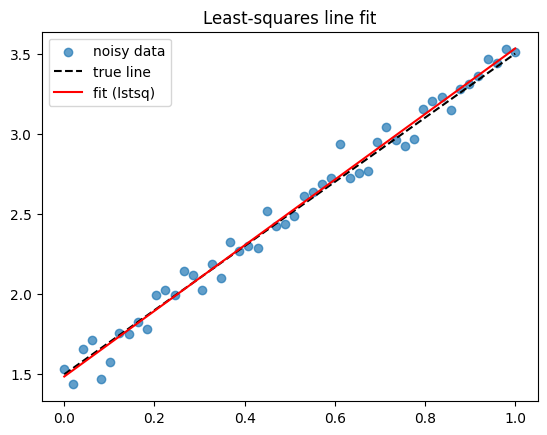

In [ ]:
plt.scatter(xdata, yobs, label="noisy data", alpha=0.7)
plt.plot(xdata, ytrue, 'k--', label="true line")
plt.plot(xdata, A @ coef, 'r-', label="fit (lstsq)")
plt.legend()
plt.title("Least-squares line fit")
plt.show()

In [3]:
import json
from jupyterquiz import display_quiz

example = \
'''
[{
  "question": "נתונות שתי נקודות ניסוי: (x=0, y=1), (x=1, y=3).<br><br>מהו הקו y = a + b·x ששיטת Least Squares תחזיר?",
  "type": "many_choice",
  "answers": [
    {
      "answer": "y = 1 + 2x",
      "correct": true,
      "feedback": "נכון! שתי נקודות מגדירות קו יחיד שעובר דרכן, כאן החיתוך a=1 והשיפוע b=2"
    },
    {
      "answer": "y = 0 + 3x",
      "correct": false,
      "feedback": "לא נכון — קו זה עובר דרך (0,0) ולא מתאים לנקודות הנתונות"
    },
    {
      "answer": "y = 2 + 1x",
      "correct": false,
      "feedback": "לא נכון — קו זה עובר דרך (0,2), לא דרך (0,1)"
    },
    {
      "answer": "y = 1.5 + 1.5x",
      "correct": false,
      "feedback": "לא נכון — זהו קו אחר, לא הקו היחיד שעובר דרך שתי הנקודות הנתונות"
    }
  ]
}]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>